# Regression Datasets
### Generating D1 dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import math as Math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)



d1_x=np.random.uniform(1,0.005,size=(100,1))
r=np.random.rand(100,1)
d1_y=1.3*(d1_x**2)+4.8*d1_x+8+r
d1_x = (d1_x - d1_x.mean())/d1_x.std() #data normalized
# x_train_d1, x_test_d1, y_train_d1, y_test_d1 =train_test_split(x,d1_y,train_size=0.8, 
#                                                                        test_size=0.2, 
#                                                                        random_state=0)

### Preprocessing Wine Quality Red dataset

In [3]:
filename=r"E:\Documents\University of Hildesheim\Machine learning lab\lab5\winequality-red.csv"
rwine_data = pd.read_csv(filename,delimiter=';')
rwine_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


The data has no numeric values

In [4]:
rwine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
Xdata_rwine = rwine_data.loc[:,rwine_data.columns!='quality']
Ydata_rwine = rwine_data[['quality']]
Xdata_rwine = (Xdata_rwine - Xdata_rwine.mean())/Xdata_rwine.std() #data normalized
x_train_rwine, x_test_rwine, y_train_rwine, y_test_rwine =train_test_split(Xdata_rwine, 
                                                                       Ydata_rwine,train_size=0.8, 
                                                                       test_size=0.2, 
                                                                       random_state=0)

In [6]:
y_train_rwine=y_train_rwine.values.reshape(-1,1)
y_test_rwine=y_test_rwine.values.reshape(-1,1)
x_train_rwine=x_train_rwine.values
x_test_rwine=x_test_rwine.values

# GLMs
### Generalized Linear Models with Scikit Learn
### 1. Ordinary least Squares

In [7]:
learning_rate=[1,0.8,0.5,0.1,0.001,0.00001]
rmsetrain=[]
rmsetest=[]
for i in learning_rate:
    model=SGDRegressor(eta0=i,learning_rate='constant',penalty=None,shuffle=True)
    model.fit(x_train_rwine,y_train_rwine)
    y_pred=model.predict(x_train_rwine)
    y_pred_test=model.predict(x_test_rwine)
    rmsetrain.append(Math.sqrt(mean_squared_error(y_train_rwine,y_pred)))
    rmsetest.append(Math.sqrt(mean_squared_error(y_test_rwine,y_pred_test)))

### Analyzing the graph we can see that the error increases as the learning rate increases

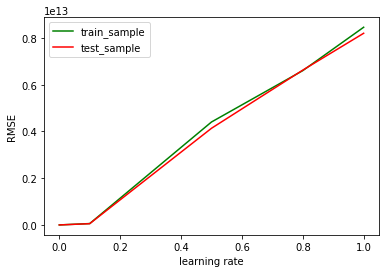

In [8]:
plt.plot(learning_rate,rmsetrain,'g',label='train_sample')
plt.plot(learning_rate,rmsetest,'r',label='test_sample')
plt.xlabel('learning rate')
plt.ylabel('RMSE')
plt.legend()
plt.show()
plt.close()

### 2. Ridge Regression

In [8]:
hyp_par=([0.8,1],[0.5,0.1],[0.001,0.01])
rmsetrain=[]
rmsetest=[]
alpha_com=[]
lamda_com=[]
for i,j in hyp_par:
    model=SGDRegressor(eta0=i,learning_rate='constant',penalty='l2',shuffle=True,alpha=j)
    model.fit(x_train_rwine,y_train_rwine)
    y_pred=model.predict(x_train_rwine)
    y_pred_test=model.predict(x_test_rwine)
    rmsetrain.append(Math.sqrt(mean_squared_error(y_train_rwine,y_pred)))
    rmsetest.append(Math.sqrt(mean_squared_error(y_test_rwine,y_pred_test)))
    alpha_com.append(i)
    lamda_com.append(j)

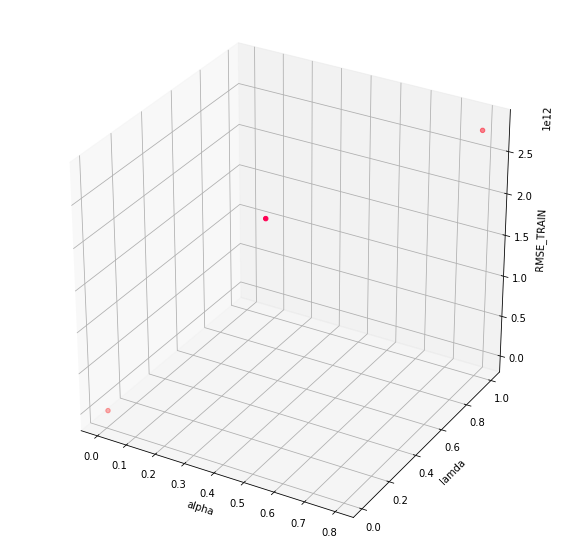

In [9]:
from mpl_toolkits import mplot3d
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, rmsetrain, c=rmsetrain, cmap='hsv')
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('RMSE_TRAIN')
plt.show()

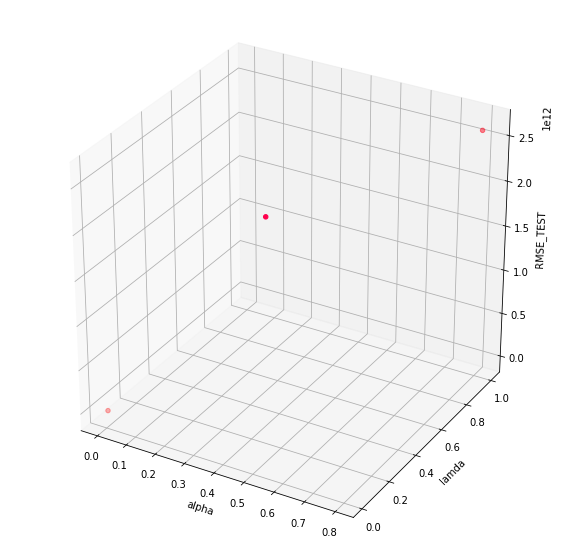

In [10]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, rmsetest, c=rmsetest, cmap='hsv')
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('RMSE_TEST')
plt.show()

### 2. LASSO

In [11]:
hyp_par=([0.8,1],[0.5,0.1],[0.001,0.01])
rmsetrain=[]
rmsetest=[]
alpha_com=[]
lamda_com=[]
for i,j in hyp_par:
    model=SGDRegressor(eta0=i,learning_rate='constant',penalty='l1',shuffle=True,alpha=j)
    model.fit(x_train_rwine,y_train_rwine)
    y_pred=model.predict(x_train_rwine)
    y_pred_test=model.predict(x_test_rwine)
    rmsetrain.append(Math.sqrt(mean_squared_error(y_train_rwine,y_pred)))
    rmsetest.append(Math.sqrt(mean_squared_error(y_test_rwine,y_pred_test)))
    alpha_com.append(i)
    lamda_com.append(j)


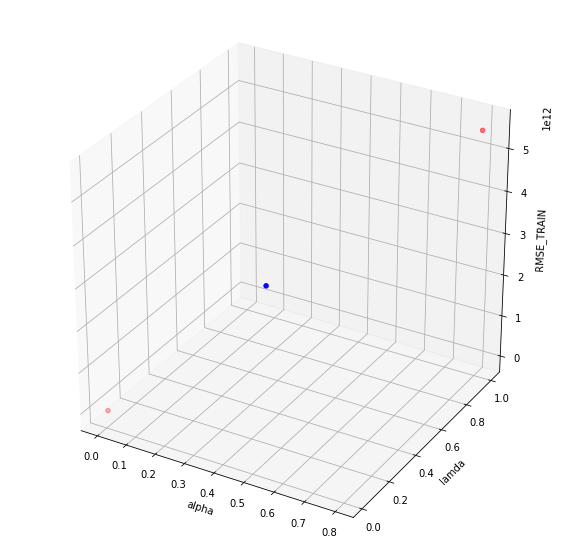

In [12]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, rmsetrain, c=rmsetrain, cmap='hsv')
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('RMSE_TRAIN')
plt.show()

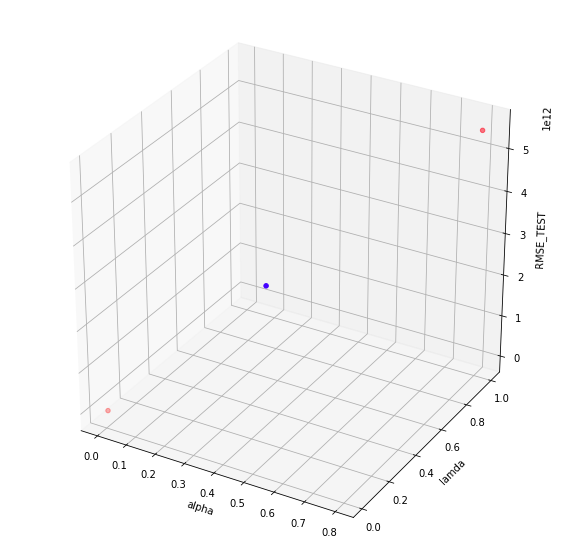

In [13]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, rmsetrain, c=rmsetest, cmap='hsv')
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('RMSE_TEST')
plt.show()

### A standard least squares model won’t generalize well for a data set different than its training data. By increasing the bias regularization reduces the variance in the dataset which shown in the 2d and 3d plots.Hence,the graphs shows that regularization reduces overfitting of the model.

# Hyperparameters using scikit learn GridSearchCV


### Hyperparameters tuning of Ordinary Least Squares

In [14]:
hyp_par={'eta0':[1,0.8,0.5,0.1,0.001,0.00001]}
model=SGDRegressor(learning_rate='constant',shuffle=True,penalty=None)
gs_ols=GridSearchCV(model,hyp_par,cv=5)
gs_ols.fit(x_train_rwine,y_train_rwine)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'eta0': [1, 0.8, 0.5, 0.1, 0.001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

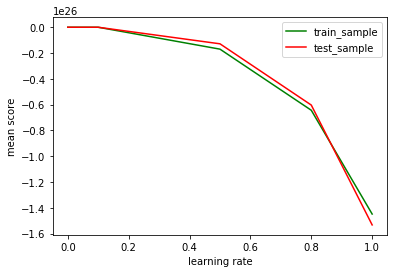

In [15]:
plt.plot(hyp_par['eta0'],gs_ols.cv_results_['mean_train_score'],'g',label='train_sample')
plt.plot(hyp_par['eta0'],gs_ols.cv_results_['mean_test_score'],'r',label='test_sample')
plt.xlabel('learning rate')
plt.ylabel('mean score')
plt.legend()
plt.show()
plt.close()

### Hyperparameters tuning of Ridge Regression

In [16]:
hyp_par={'eta0':[1,0.8,0.5,0.1,0.001,0.00001],'alpha':[0.8,0.5,0.3,0.1,0.001,0.0001]}

model=SGDRegressor(learning_rate='constant',shuffle=True,penalty='l1')
gs_rr=GridSearchCV(model,hyp_par,cv=5)
gs_rr.fit(x_train_rwine,y_train_rwine)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'eta0': [1, 0.8, 0.5, 0.1, 0.001, 1e-05], 'alpha': [0.8, 0.5, 0.3, 0.1, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
alpha_com=[]
lamda_com=[]
for i in range(len(gs_rr.cv_results_['params'])):
    alpha_com.append(gs_rr.cv_results_['params'][i]['alpha'])
    lamda_com.append(gs_rr.cv_results_['params'][i]['eta0'])

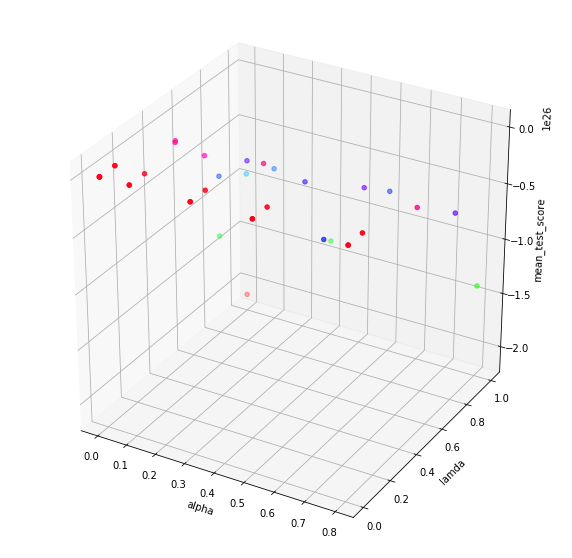

In [18]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, gs_rr.cv_results_['mean_test_score'], c=gs_rr.cv_results_['mean_test_score'], cmap='hsv')
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('mean_test_score')
plt.show()

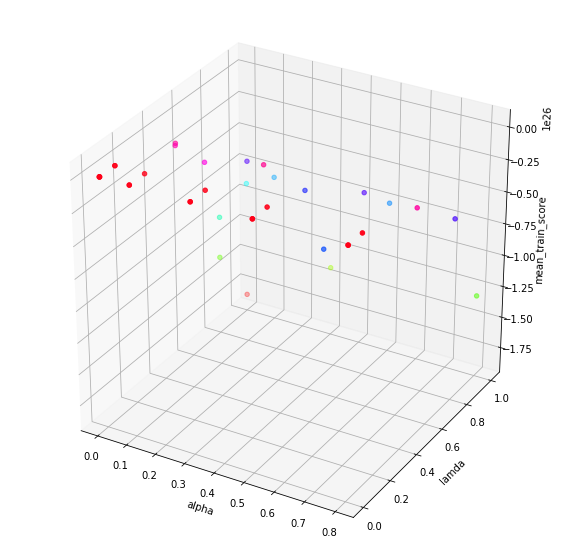

In [19]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, gs_rr.cv_results_['mean_train_score'], c=gs_rr.cv_results_['mean_train_score'], cmap='hsv')
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('mean_train_score')
plt.show()

### Hyperparameters tuning of LASSO

In [20]:
hyp_par={'eta0':[1,0.8,0.5,0.1,0.001,0.00001],'alpha':[0.8,0.5,0.3,0.1,0.001,0.0001]}

model=SGDRegressor(learning_rate='constant',shuffle=True,penalty='l2')
gs_lasso=GridSearchCV(model,hyp_par,cv=5)
gs_lasso.fit(x_train_rwine,y_train_rwine)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'eta0': [1, 0.8, 0.5, 0.1, 0.001, 1e-05], 'alpha': [0.8, 0.5, 0.3, 0.1, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
alpha_com=[]
lamda_com=[]
for i in range(len(gs_lasso.cv_results_['params'])):
    alpha_com.append(gs_lasso.cv_results_['params'][i]['alpha'])
    lamda_com.append(gs_lasso.cv_results_['params'][i]['eta0'])

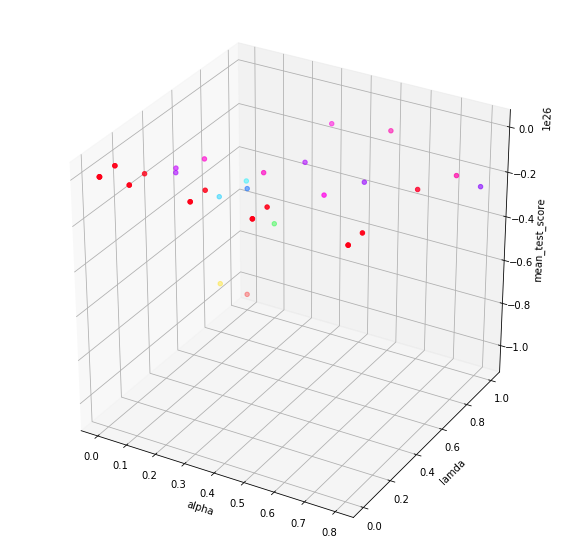

In [22]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, gs_lasso.cv_results_['mean_test_score'], c=gs_lasso.cv_results_['mean_test_score'], cmap='hsv')
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('mean_test_score')
plt.show()

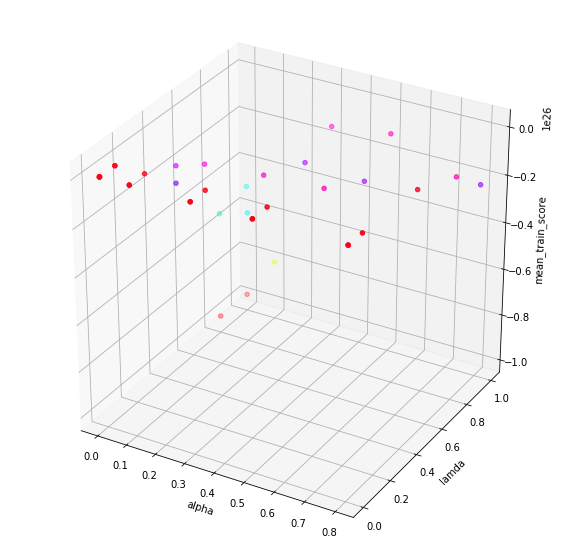

In [23]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, gs_lasso.cv_results_['mean_train_score'], c=gs_lasso.cv_results_['mean_train_score'], cmap='hsv',)
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('mean_train_score')
plt.show()

### The tuning parameter 'alpha' controls the impact on bias and variance. As the value of alpha rises, it reduces the value of coefficients and thus reducing the variance. But after certain value of alpha,  there is a rise to bias in the model and thus underfitting. Therefore, the value of alpha should be carefully selected.

### Cross validation on ordinary least squares

In [24]:
model=SGDRegressor(learning_rate='constant',shuffle=True,penalty=None,eta0=gs_ols.best_params_['eta0'])
model.fit(x_train_rwine,y_train_rwine)
y_pred=model.predict(x_train_rwine)
y_pred_test=model.predict(x_test_rwine)
cross_val_train_ols=cross_val_score(model,x_train_rwine,y_train_rwine,cv=5)
cross_val_test_ols=cross_val_score(model,x_test_rwine,y_test_rwine,cv=5)

### Cross validation on Ridge Regression

In [25]:
model=SGDRegressor(learning_rate='constant',shuffle=True,penalty='l2',eta0=gs_rr.best_params_['eta0'],alpha=gs_rr.best_params_['alpha'])
model.fit(x_train_rwine,y_train_rwine)
y_pred=model.predict(x_train_rwine)
y_pred_test=model.predict(x_test_rwine)
cross_val_train_rr=cross_val_score(model,x_train_rwine,y_train_rwine,cv=5)
cross_val_test_rr=cross_val_score(model,x_test_rwine,y_test_rwine,cv=5)

### Cross validation on LASSO

In [26]:
model=SGDRegressor(learning_rate='constant',shuffle=True,penalty='l2',eta0=gs_lasso.best_params_['eta0'],alpha=gs_lasso.best_params_['alpha'])
model.fit(x_train_rwine,y_train_rwine)
y_pred=model.predict(x_train_rwine)
y_pred_test=model.predict(x_test_rwine)
cross_val_train_lasso=cross_val_score(model,x_train_rwine,y_train_rwine,cv=5)
cross_val_test_lasso=cross_val_score(model,x_test_rwine,y_test_rwine,cv=5)

Demontrating training data of all the models in box plot


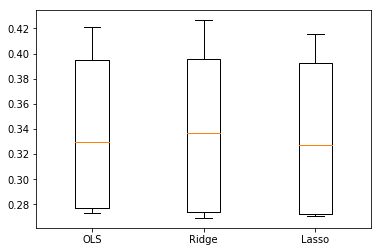

In [27]:
print('Demontrating training data of all the models in box plot')

plt.boxplot([cross_val_train_ols,cross_val_train_rr,cross_val_train_lasso])
plt.xticks(np.arange(1,4),('OLS','Ridge','Lasso'))
plt.show()

Demontrating test data of all the models in box plot


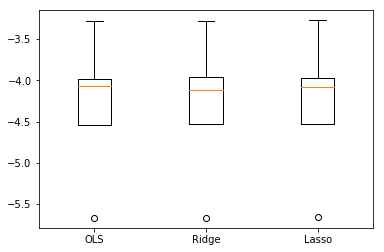

In [28]:
print('Demontrating test data of all the models in box plot')

plt.boxplot([cross_val_test_ols,cross_val_test_rr,cross_val_test_lasso])
plt.xticks(np.arange(1,4),('OLS','Ridge','Lasso'))
plt.show()

### After doing the cross validation score and representing it in a box plot we can see that regularized model is better than unregularized model

# Polynomial Regression

### Prediction with high degree of polynomials

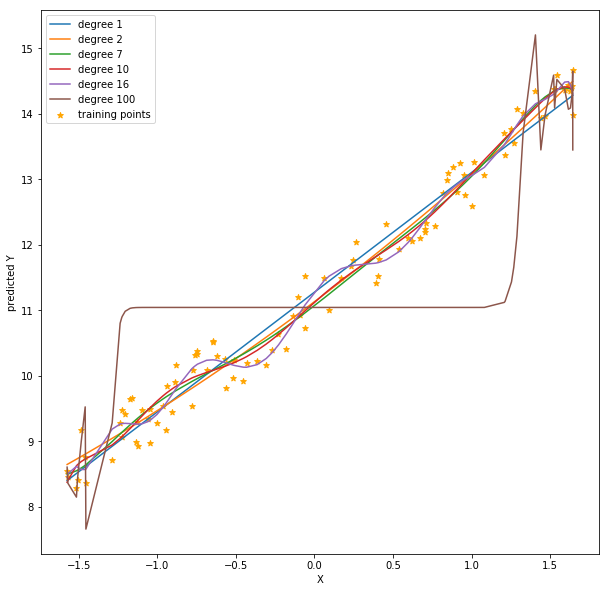

In [29]:
fig,axs=plt.subplots(1,1,figsize=(10,10))
axs.scatter(d1_x,d1_y,color='orange',marker='*',label="training points")
axs.set_xlabel('X')
axs.set_ylabel('predicted Y')
axs.legend()
rmse=[]
degree=[1,2,7,10,16,100]
for i in degree:
    model=LinearRegression()
    polyf=PolynomialFeatures(degree=i)
    poly_x=polyf.fit_transform(d1_x)
    model.fit(poly_x,d1_y)
    y_pred=model.predict(poly_x)
    X,Y=zip(*sorted(zip(d1_x,y_pred)))
    axs.plot(X,Y,label="degree %i" % i)
axs.legend()
plt.show()


### As the degree increases the error also increases which is illustrated in the graph

### Effect of Regularization

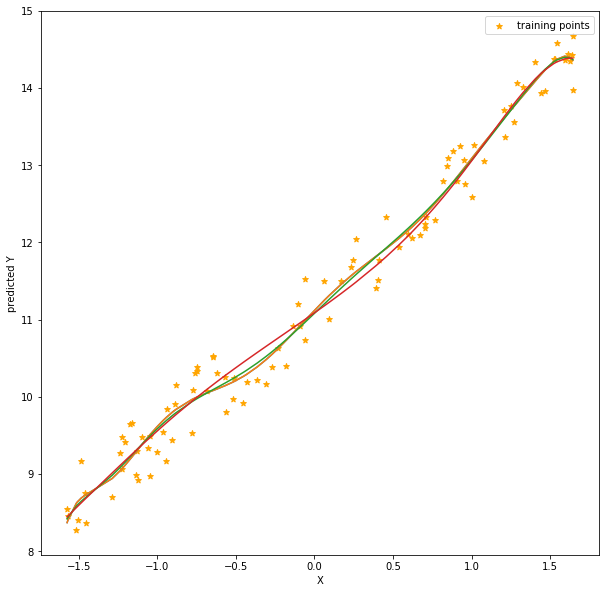

In [30]:
lamda=[0,10**-6,10**-2,1]
fig,axs=plt.subplots(1,1,figsize=(10,10))
axs.scatter(d1_x,d1_y,color='orange',marker='*',label="training points")
axs.set_xlabel('X')
axs.set_ylabel('predicted Y')
axs.legend()
for i in lamda:
    model=Ridge(alpha=i)
    polyf=PolynomialFeatures(degree=10)
    poly_x=polyf.fit_transform(d1_x)
    model.fit(poly_x,d1_y)
    y_pred=model.predict(poly_x)
    X,Y=zip(*sorted(zip(d1_x,y_pred)))
    axs.plot(X,Y)
axs.legend()
plt.show()


### We can see that lower lamda values are giving good results with the degree=10

# Coordinate Descent

### Implementing Coordinate Descent

In [202]:
def coordinate_descent(x,y,epochs):
    m_train,n_features = np.shape(x)
    beta               = np.zeros(n_features).reshape(-1,1)
    
    beta_hist=np.zeros((epochs+1,n_features))
    hist = []
    for j in range(epochs):
        for i in range(len(beta)):
            # choosing x coordinate to update
            _x = x[:,i]
            x_coor=np.delete(x,i,axis=1)
            
            #choosing beta to update
            beta_coor=np.delete(beta,i,axis=0)
            
            col = x_coor.dot(beta_coor)
            num = ((y - col).T).dot(_x)
            den = _x.T.dot(_x)
            update = num/den   
            beta[i] = update
            #print(update)
            
        beta_hist[j+1] = beta.ravel()
    
    return beta,beta_hist

In [203]:
mtrain,n = x_train_rwine.shape
Xtrain = np.concatenate((x_train_rwine, np.ones(mtrain).reshape(-1,1)), axis = 1)

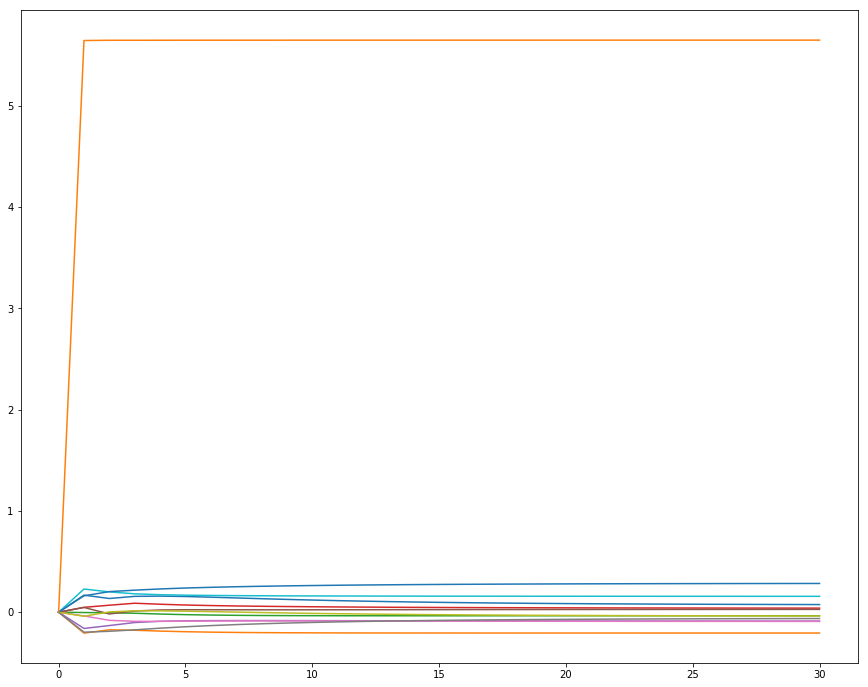

In [204]:
epochs=30
plt.figure(figsize = (15,12))
beta,hist = coordinate_descent(Xtrain,y_train_rwine,epochs)
plt.plot(hist)
plt.show()
plt.close()

In [205]:
def soft_threshold(beta,reg): 
    if beta < - reg:
        return (beta + reg)
    elif beta >  reg:
        return (beta - reg)
    else: 
        return 0
    
def coordinate_descent(x,y,epochs,lamda = 1, lasso = False):
    m_train,n_features = np.shape(x)
    beta               = np.zeros(n_features).reshape(-1,1)
    
    beta_hist=np.zeros((epochs+1,n_features))
    hist = []
    
    if lasso:
        print(f"Using Lasso with regularization {lamda}")
        
    for j in range(epochs):
        for i in range(len(beta)):
            # choosing x coordinate to update
            _x = x[:,i]
            x_coor=np.delete(x,i,axis=1)
            
            #choosing beta to update
            beta_coor=np.delete(beta,i,axis=0)
            
            col = x_coor.dot(beta_coor)
            num = ((y - col).T).dot(_x)
            den = _x.T.dot(_x)
            update = num/den
                     
            if lasso:
                reg = 0.5 * lamda / (_x.T.dot(_x))
                update = soft_threshold(update,reg)
                
            beta[i] = update
            #print(update)
            
        beta_hist[j+1] = beta.ravel()
    
    return beta,beta_hist

In [206]:
mtrain,n = x_train_rwine.shape
Xtrain = np.concatenate((x_train_rwine, np.ones(mtrain).reshape(-1,1)), axis = 1)

Using Lasso with regularization 1e-06


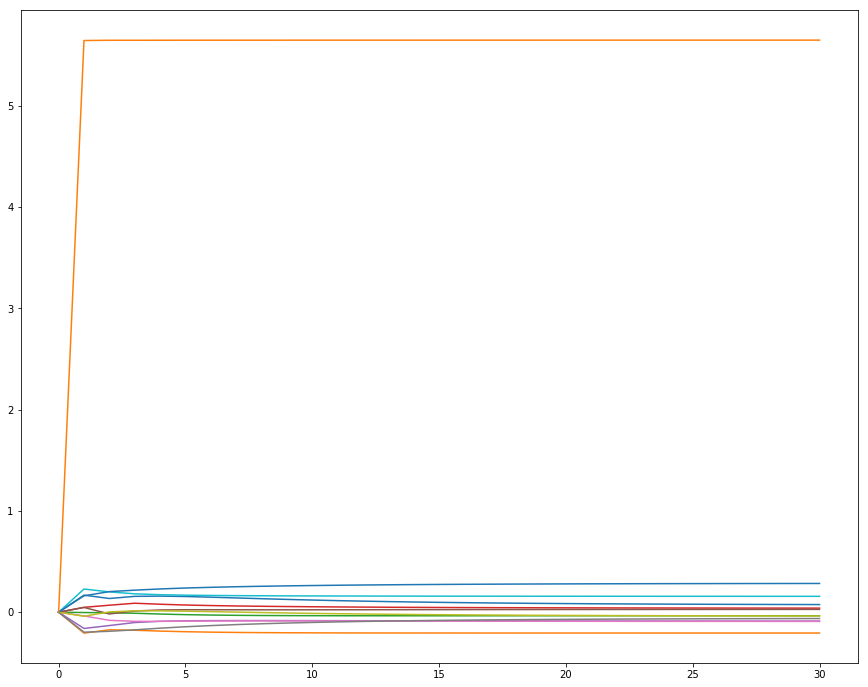

In [208]:
epochs=30
plt.figure(figsize = (15,12))
beta,hist = coordinate_descent(Xtrain,y_train_rwine,epochs,lamda = 0.000001, lasso = True)
plt.plot(hist)
plt.show()
plt.close()

### comparing the two graphs we can see that the reguralized model betas are more closer to each other than regularized model